In [1]:
# License: BSD
# Author: Sasank Chilamkurthy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
classes = ['hump', 'pothole']

In [3]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/kaggle/input/potholehumpvgg/customdataset'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



In [4]:
model_ft = models.resnet34(pretrained = False)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
model_ft.fc = nn.Linear(num_ftrs, 2)


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [5]:
model_ft.load_state_dict(torch.load('/kaggle/input/resnet-tl/best_model.pth', map_location=device))
model_ft.to(device)

model_ft.eval()
correct = 0
total = 0
predictions = []
true_labels = []
with torch.no_grad():
    for inputs, labels in dataloaders['train']:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_ft(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predictions.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

# Convert predictions and true labels to numpy arrays
predictions = np.array(predictions)
true_labels = np.array(true_labels)



test_accuracy = correct / total
print(f"Training Accuracy: {test_accuracy}")

Training Accuracy: 0.9789758534554538


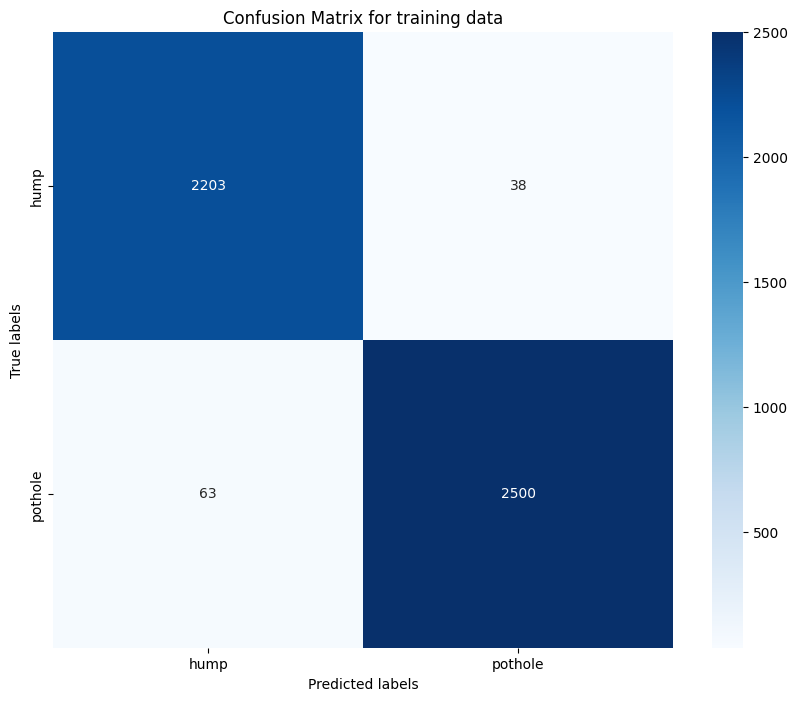

In [6]:
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for training data')
plt.show()

In [7]:
print('Training')
print(classification_report(true_labels, predictions, digits = 8))

Training
              precision    recall  f1-score   support

           0  0.97219771 0.98304328 0.97759041      2241
           1  0.98502758 0.97541943 0.98019996      2563

    accuracy                      0.97897585      4804
   macro avg  0.97861264 0.97923136 0.97889519      4804
weighted avg  0.97904262 0.97897585 0.97898264      4804



In [8]:

model_ft.eval()
correct = 0
total = 0
predictions = []
true_labels = []
with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_ft(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predictions.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

# Convert predictions and true labels to numpy arrays
predictions = np.array(predictions)
true_labels = np.array(true_labels)



test_accuracy = correct / total
print(f"Validation Accuracy: {test_accuracy}")

Validation Accuracy: 0.9787234042553191


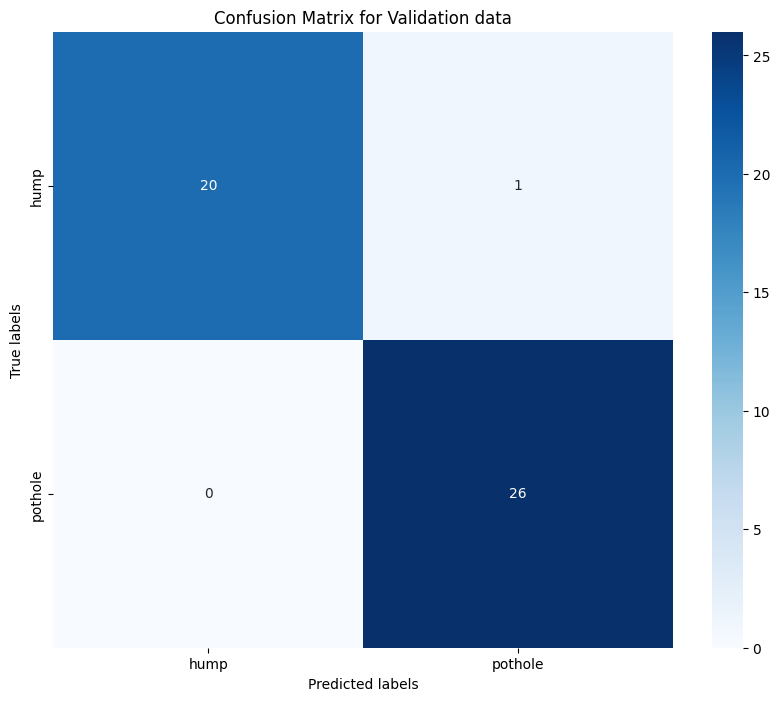

In [9]:
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Validation data')
plt.show()

In [10]:
print('Validation')
print(classification_report(true_labels, predictions, digits = 8))

Validation
              precision    recall  f1-score   support

           0  1.00000000 0.95238095 0.97560976        21
           1  0.96296296 1.00000000 0.98113208        26

    accuracy                      0.97872340        47
   macro avg  0.98148148 0.97619048 0.97837092        47
weighted avg  0.97951143 0.97872340 0.97866466        47



In [11]:
image_dataset = datasets.ImageFolder('/kaggle/input/vggtest/vggtest',
                                          data_transforms['test'])
test_loader = torch.utils.data.DataLoader(image_dataset, batch_size=4,
                                             shuffle=True, num_workers=4)

In [12]:

model_ft.eval()
correct = 0
total = 0
predictions = []
true_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_ft(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predictions.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

# Convert predictions and true labels to numpy arrays
predictions = np.array(predictions)
true_labels = np.array(true_labels)



test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9938650306748467


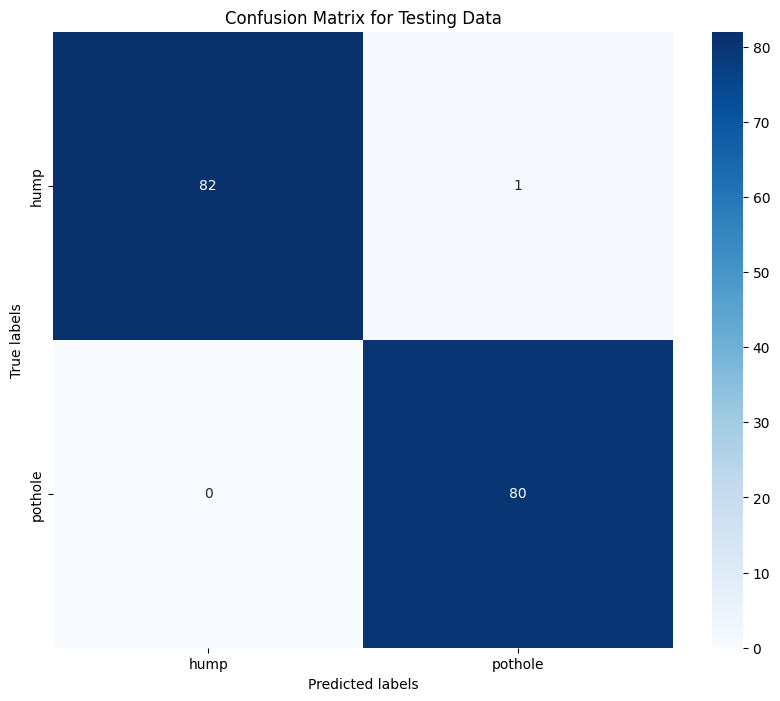

In [13]:
cm = confusion_matrix(true_labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Testing Data')
plt.show()


In [14]:
print(classification_report(true_labels, predictions, digits = 8))

              precision    recall  f1-score   support

           0  1.00000000 0.98795181 0.99393939        83
           1  0.98765432 1.00000000 0.99378882        80

    accuracy                      0.99386503       163
   macro avg  0.99382716 0.99397590 0.99386411       163
weighted avg  0.99394077 0.99386503 0.99386549       163

